In [5]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import re
from collections import Counter


In [7]:
# Открываем файл и читаем содержимое
file_path = "/Users/runi/Desktop/cf_pyth/pythontasks/20th_century_scrape.txt"

with open(file_path, "r", encoding="utf-8") as file:
    text = file.read()

# Выводим первые 500 символов для проверки
print(text[:500])




Timeline of the 20th century - Wikipedia



























Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us





		Contribute
	


HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages



















Search











Search






















Appearance
















Donate

Create account

Log in








Personal tools





Donate Create account Lo


In [8]:
# Проверяем, какие символы встречаются в тексте
char_counts = Counter(text)
print(char_counts.most_common(50))  # Выведем 50 самых частых символов

# Проверяем наличие необычных символов или пробельных конструкций
print(re.findall(r"[^\w\s,.-]", text))  # Вывод всех странных символов


[(' ', 14382), ('e', 9277), ('a', 6215), ('i', 6142), ('n', 5824), ('t', 5539), ('r', 5091), ('o', 5038), ('s', 4389), ('\n', 3139), ('l', 2987), ('h', 2713), ('d', 2581), ('c', 2266), ('u', 2118), ('m', 1842), ('f', 1522), ('.', 1507), ('b', 1429), ('p', 1384), ('g', 1357), ('y', 1143), ('1', 1091), (':', 1036), ('v', 733), ('S', 690), ('A', 629), ('2', 628), (',', 587), ('T', 585), ('9', 568), ('0', 542), ('M', 516), ('w', 512), ('C', 488), ('k', 420), ('J', 384), ('P', 384), ('I', 360), ('B', 360), ('W', 308), ('N', 298), ('3', 291), ('F', 285), ('R', 279), ('D', 267), ('5', 263), ('7', 247), ('8', 246), ('4', 237)]
['!', '(', ')', '–', '–', '/', '(', ')', '(', ')', ':', '"', '"', '–', '·', '·', '·', '·', '(', ')', '(', ')', '(', ')', '(', ')', '(', ')', ':', '–', '–', '[', ']', ':', '[', ']', ':', '[', ']', ':', "'", ':', ':', ':', "'", ':', ':', ':', '[', ']', ':', ':', ':', ':', ':', '–', '[', ']', ':', ':', ':', '[', ']', '–', ':', ':', ':', '–', ':', '–', '[', ']', '[', ']', ':

In [15]:
import re

# Очищаем текст от ненужных символов
clean_text = re.sub(r"[^\w\s,.]", "", text)  # Убираем все, кроме букв, пробелов, точек и запятых
clean_text = re.sub(r"\s+", " ", clean_text)  # Заменяем лишние пробелы и переводы строк на один пробел

# Проверяем первые 500 символов очищенного текста
print(clean_text[:500])

# Сохраняем очищенный текст
with open("/Users/runi/Desktop/cf_pyth/pythontasks/20th_century_scrape_cleaned.txt", "w", encoding="utf-8") as file:
    file.write(clean_text)



 Timeline of the 20th century Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in Pages for logged out editors learn more ContributionsTalk Photograph your local culture, help Wikipedia and win Contents move to sidebar hid


In [17]:
import spacy

nlp = spacy.load("en_core_web_sm")  # Подгружаем модель spaCy
print("spaCy загружена успешно!")


nlp = spacy.load("en_core_web_sm")  # Подгружаем предобученную модель spaCy


# Пропускаем текст через NLP-модель
doc = nlp(clean_text)

# Выводим первые 10 сущностей
for ent in list(doc.ents)[:10]:
    print(ent.text, ent.label_)


spaCy загружена успешно!
the 20th century DATE
Wikipedia Jump ORG
Main ORG
Navigation Main ORG
Contribute HelpLearn ORG
Search NORP
Donate Create PRODUCT
Wikipedia ORG
1 1900s DATE
1900s DATE


In [19]:
import pycountry

# Получаем список всех стран в английском
countries = [country.name for country in pycountry.countries]

# Фильтруем сущности, оставляя только страны
country_mentions = [ent.text for ent in doc.ents if ent.label_ == "GPE" and ent.text in countries]

# Выводим 10 наиболее упоминаемых стран
print(Counter(country_mentions).most_common(10))


[('China', 25), ('Germany', 16), ('Japan', 15), ('France', 14), ('India', 12), ('Israel', 12), ('Philippines', 11), ('Brazil', 10), ('Italy', 9), ('Poland', 7)]


In [21]:
import itertools

# Создаем пары стран, которые упоминаются в одном предложении
country_pairs = []

for sent in doc.sents:
    mentioned_countries = [ent.text for ent in sent.ents if ent.label_ == "GPE" and ent.text in countries]
    if len(mentioned_countries) > 1:
        country_pairs.extend(itertools.combinations(mentioned_countries, 2))

# Создаем DataFrame
df = pd.DataFrame(country_pairs, columns=["Country1", "Country2"])

# Сохраняем
df.to_csv("/Users/runi/Desktop/cf_pyth/pythontasks/country_relationships.csv", index=False)

print(df.head())


        Country1 Country2
0        Germany    Italy
1         Panama   Panama
2         Sweden   Norway
3          Japan    China
4  United States     Cuba


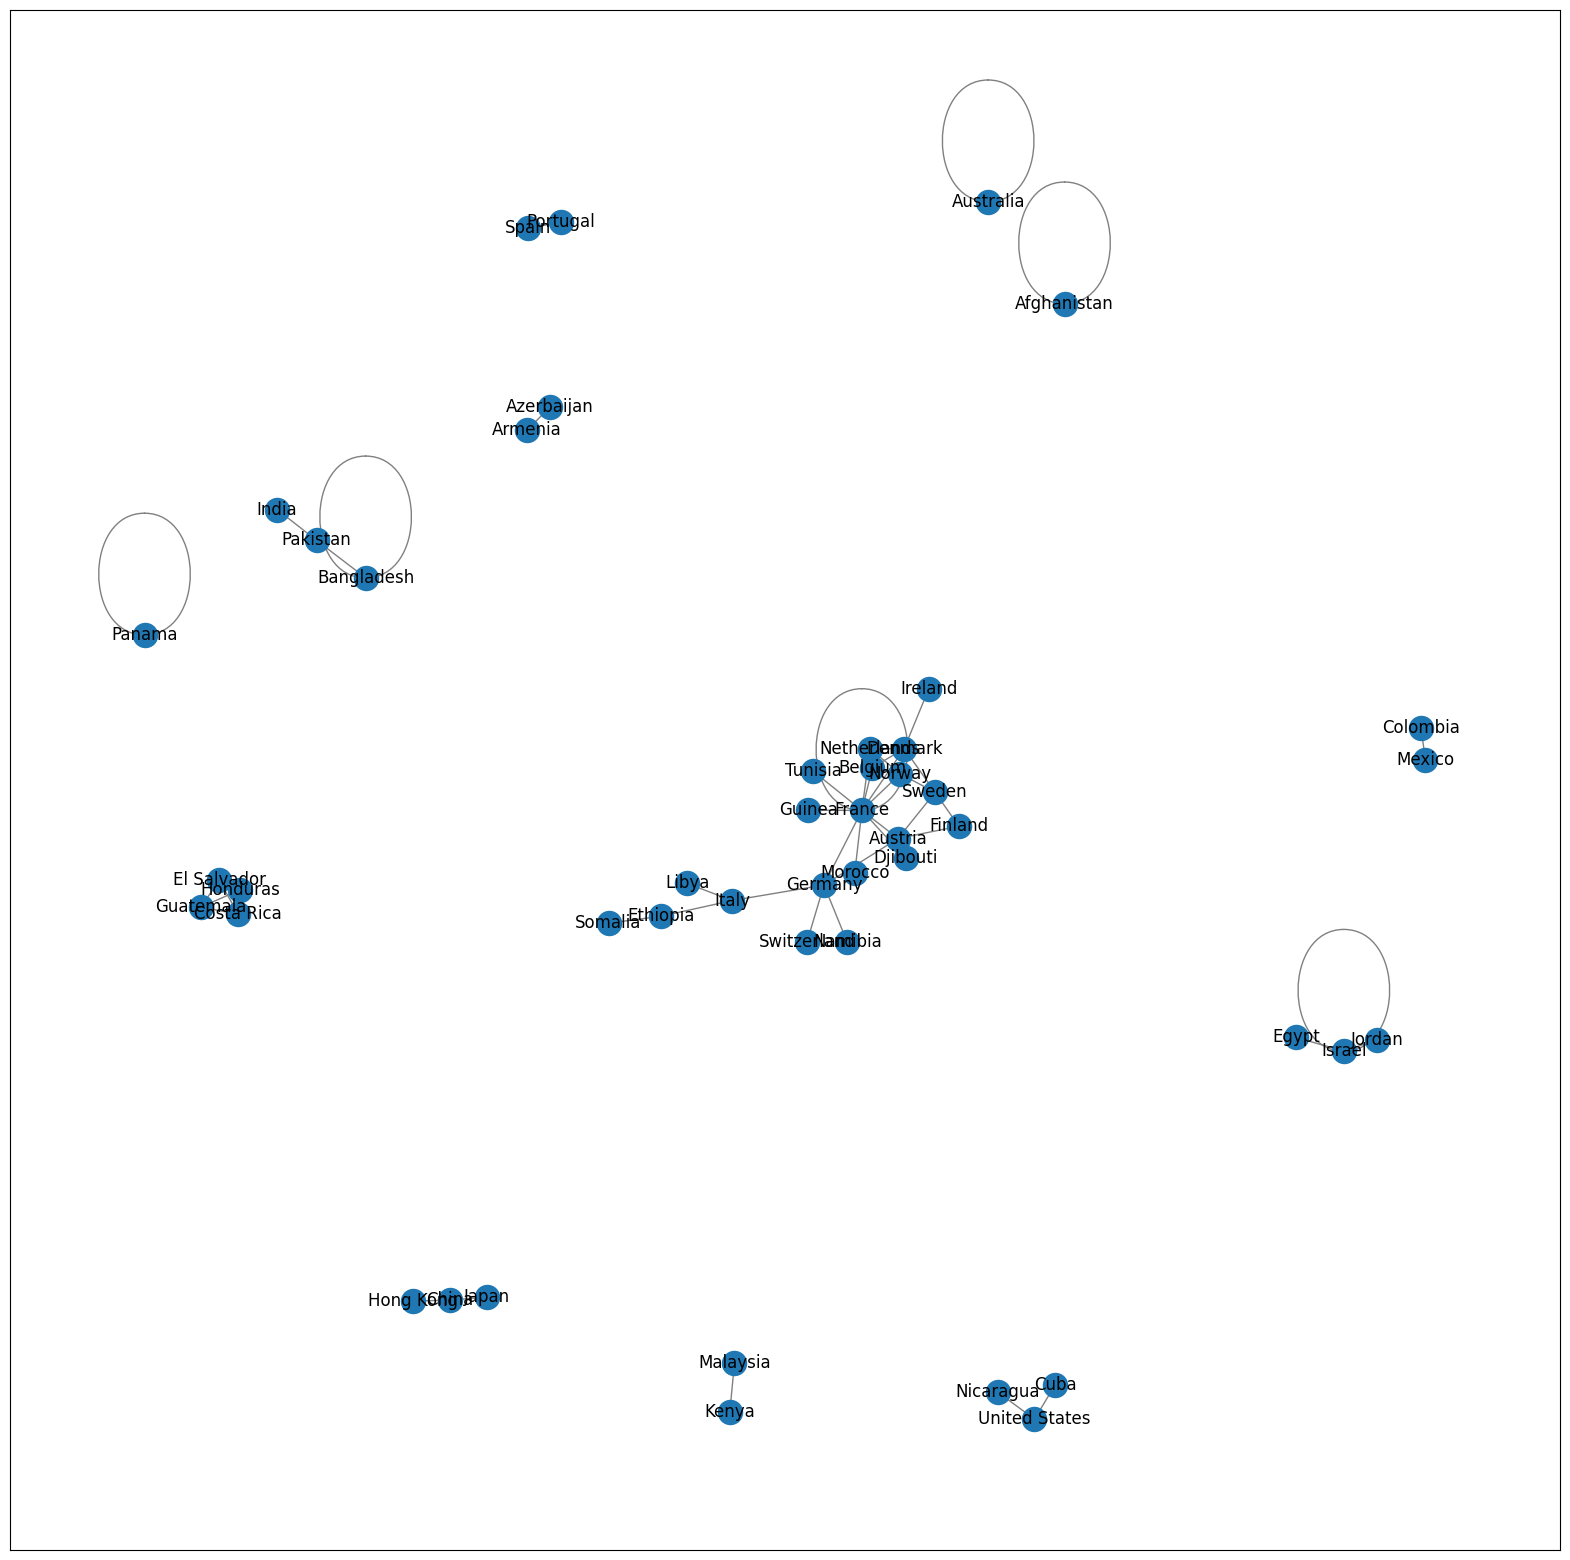

In [39]:
# Создаем граф
G = nx.Graph()

# Добавляем связи
for _, row in df.iterrows():
    G.add_edge(row["Country1"], row["Country2"])

# Рисуем граф
plt.figure(figsize=(20, 20))
nx.draw_networkx(G, with_labels=True, node_size=300, font_size=12, edge_color="gray")
plt.show()
